---
title: "추천 시스템 스터디 실습 예제 1"
author: "Sangkon Han"
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import koreanize_matplotlib

## 데이터 읽어오기

In [2]:
df = pd.read_csv("data/출생아수(2022).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 937 entries, 시군구별 to 2022.12.2
dtypes: object(937)
memory usage: 139.2+ KB


### info에 대한 이해
- 행, row, 종속변인
- 열, col, 독립변인, 특징, feat

## 데이터 확인
- [Tidy Data](https://vita.had.co.nz/papers/tidy-data.pdf)

In [3]:
df.head()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2,2022.12,2022.12.1,2022.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,10715,20646,10530,10116,18981,9737,9244,16896,8684,8212
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,1831,3612,1794,1818,3230,1678,1552,2901,1472,1429
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,575,1166,602,564,977,479,498,957,528,429
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,416,848,428,420,802,406,396,663,334,329


## 데이터 변형
- https://pandas.pydata.org/docs/reference/api/pandas.melt.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
- https://pandas.pydata.org/docs/reference/api/pandas.merge.html
- https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [4]:
df = df.melt(id_vars="시군구별")
df.head()

,시군구별,variable,value
0,시군구별,1997.01,계 (명)
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345


In [5]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#
df["시군구별"].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [6]:
# https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
df = df[df["시군구별"] != "시군구별"].copy()


df.shape

(16848, 3)

In [7]:
df["시군구별"].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [8]:
df.head()

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646


In [9]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html#pandas-series-str-split
df["연도"] = df["variable"].str.split(".", expand=True)[0]


df["월"] = df["variable"].str.split(".", expand=True)[1]


df["성별"] = df["variable"].str.split(".", expand=True)[2]


df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997.01,63268,1997,01,None
2,서울특별시,1997.01,13205,1997,01,None
3,부산광역시,1997.01,4201,1997,01,None
4,대구광역시,1997.01,3345,1997,01,None
5,인천광역시,1997.01,3646,1997,01,None


In [10]:
df.tail()

,시군구별,variable,value,연도,월,성별
17779,전라북도,2022.12.2,229,2022,12,2
17780,전라남도,2022.12.2,250,2022,12,2
17781,경상북도,2022.12.2,366,2022,12,2
17782,경상남도,2022.12.2,503,2022,12,2
17783,제주특별자치도,2022.12.2,121,2022,12,2


In [11]:
df["성별"].unique()

array([None, '1', '2'], dtype=object)

In [12]:
df["성별"].nunique()

2

In [13]:
df["성별"] = df["성별"].fillna("전체")
df["성별"].unique()

array(['전체', '1', '2'], dtype=object)

In [14]:
df["성별"] = df["성별"].replace("1", "남자").replace("2", "여자")
df["성별"].unique()

array(['전체', '남자', '여자'], dtype=object)

In [15]:
df["성별"].value_counts()

성별
전체    5616
남자    5616
여자    5616
Name: count, dtype: int64

In [16]:
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체


In [17]:
df = df.rename(columns={"variable": "기간", "value": "출생아수"})
df.head()

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16848 entries, 1 to 17783
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    16848 non-null  object
 1   기간      16848 non-null  object
 2   출생아수    16848 non-null  object
 3   연도      16848 non-null  object
 4   월       16848 non-null  object
 5   성별      16848 non-null  object
dtypes: object(6)
memory usage: 921.4+ KB


In [19]:
# https://pandas.pydata.org/docs/user_guide/missing_data.html#values-considered-missing
df["출생아수"] = df["출생아수"].replace("-", np.nan)
df["출생아수"] = df["출생아수"].astype(float)
df["출생아수"].describe()

count    16308.000000
mean      2898.333579
std       6406.925280
min         30.000000
25%        589.000000
50%        980.000000
75%       1833.250000
max      63268.000000
Name: 출생아수, dtype: float64

In [20]:
df_all = df[(df["시군구별"] == "전국") & (df["성별"] == "전체")]
df_all.head(2)

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268.0,1997,01,전체
58,전국,1997.02,58144.0,1997,02,전체


In [21]:
df_all = df_all[["연도", "월", "출생아수"]].copy()
df_all.head()

,연도,월,출생아수
1,1997,01,63268.0
58,1997,02,58144.0
115,1997,03,62160.0
172,1997,04,56949.0
229,1997,05,55270.0


<Axes: xlabel='연도,월'>

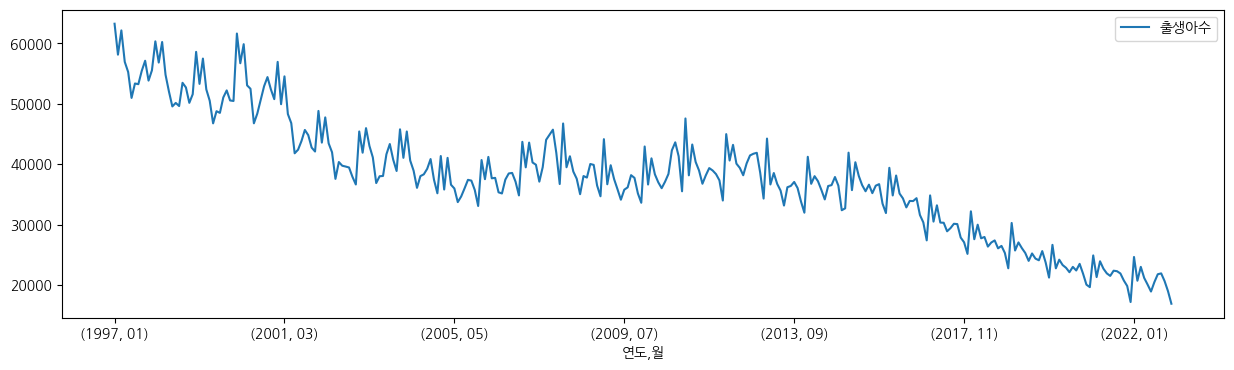

In [22]:
df_all.set_index(["연도", "월"]).plot(figsize=(15, 4))

<Axes: xlabel='연도'>

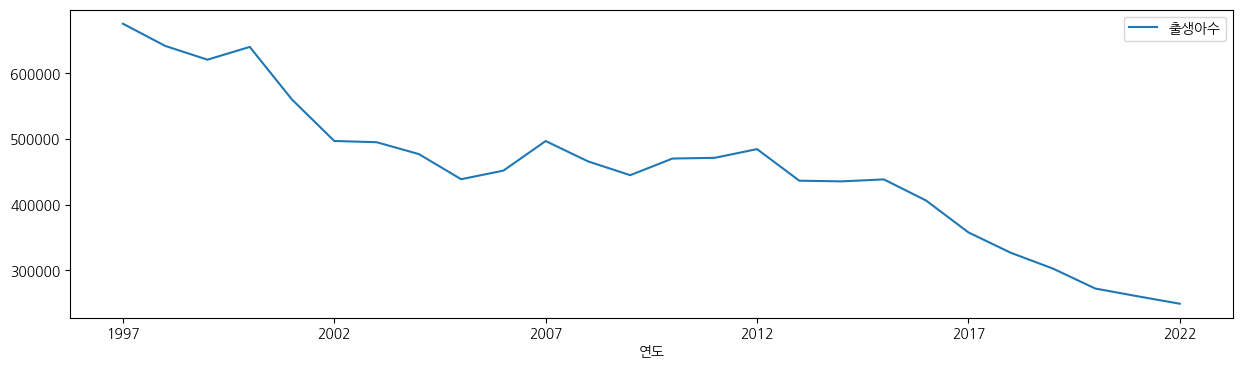

In [30]:
df_all.groupby("연도").sum().plot(figsize=(15, 4))

<Axes: xlabel='연도', ylabel='출생아수'>

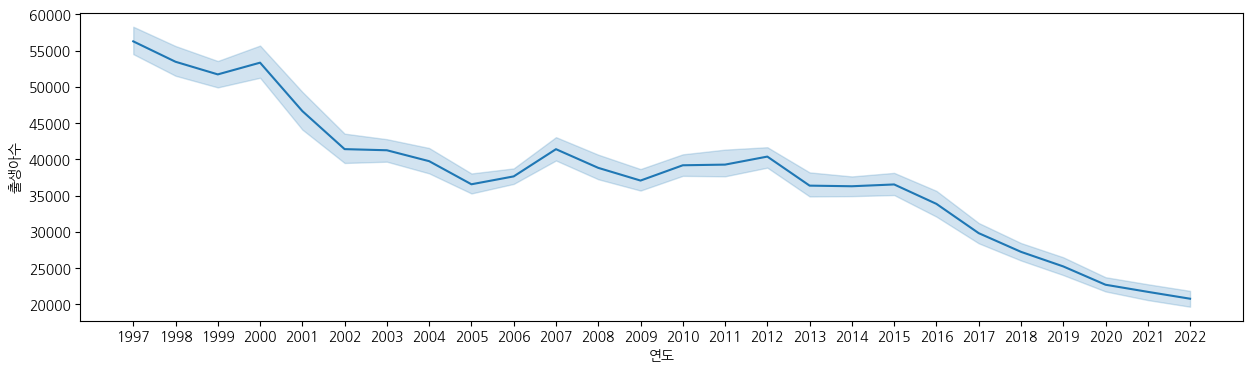

In [31]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_all, x="연도", y="출생아수")